1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

# 1. Познакомьтесь с данными.
---

In [5]:
#загружаем данные 
data = pd.read_csv('./data/air_data.csv', sep=';')

data.head()

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE


In [6]:
data.shape

(50000, 9)

Данный датасет состоит из 5000 строк и 9 столбцов.

In [7]:
#выводим общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ISSUE_DATE         50000 non-null  object
 1   FLIGHT_DATE_LOC    50000 non-null  object
 2   PAX_TYPE           50000 non-null  object
 3   REVENUE_AMOUNT     50000 non-null  int64 
 4   ORIG_CITY_CODE     49998 non-null  object
 5   DEST_CITY_CODE     49999 non-null  object
 6   ROUTE_FLIGHT_TYPE  50000 non-null  object
 7   FFP_FLAG           19398 non-null  object
 8   SALE_TYPE          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


Датасет содержит столбцы, которые мы в дальнейшем преобразуем.

ВЫВОД ПО ЗАДАНИЮ 1: 
Мы загрузили файл air_data.csv и выгрузили основную информацию о датасете. Он содержит информацию о продажах авиабилетов с такими признаками, как дата покупки, дата перелета, тип пассажиров, сумма выручки, города отправления и назначения, наличие программы лояльности и способ покупки.

# 2. Осуществите предобработку данных.
---
## 2.1 Приведите заголовки к удобному виду.

In [8]:
#переведем названия всех заголовков в нижний регистр
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [9]:
#выведем, что у нас получилось после преобразования
data.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE


Мы преобразовали названия столбцов и заменили все пробелы, находящиеся между словами в названиях столбцов, состоящих из нескольких слов. (Пс: пробелов между словами не было, но мы проверили на всякий случай)

## 2.2 Проверьте типы данных.


In [10]:
#проведем проверку типа данных каждого столбца
data.dtypes

issue_date           object
flight_date_loc      object
pax_type             object
revenue_amount        int64
orig_city_code       object
dest_city_code       object
route_flight_type    object
ffp_flag             object
sale_type            object
dtype: object

Первый и второй столбец (issue_date и flight_date_loc соответственно) содержат информацию о дате и времени, но имеют типа данных - строка, а для дальнейшего анализа нужно преобразовать в datetime формата ДД-ММ-ГГ чч:мм:сс.

In [11]:
#приведем даты к типу datetime
data['issue_date'] = pd.to_datetime(data['issue_date'], format='%Y-%m-%d %H:%M:%S')
data['flight_date_loc'] = pd.to_datetime(data['flight_date_loc'], format='%Y-%m-%d %H:%M:%S')

In [12]:
#проверим изменился ли тип данных в первух двух столбцах
data.dtypes

issue_date           datetime64[ns]
flight_date_loc      datetime64[ns]
pax_type                     object
revenue_amount                int64
orig_city_code               object
dest_city_code               object
route_flight_type            object
ffp_flag                     object
sale_type                    object
dtype: object

In [13]:
#посмотрим сколько уникальных значений содержится в столбце ffp_flag 
data['ffp_flag'].unique()

array([nan, 'FFP'], dtype=object)

Используя функцию map(), которая применит функцию к каждом элементу, изменим тип данных в столбце ffp_flag на 0 и 1, чтобы дальше было удобнее проводить анализ данных.

In [14]:
data['ffp_flag'] = data['ffp_flag'].map({
    np.nan: 0, 
    'FFP': 1 
}) 

Сделали то же самое, что и в строке выше, создав новый столбец в датасете international_flight, для дальнейшего удобства.

In [15]:
data['international_flight'] = data['route_flight_type'].map({
    'ВВЛ': 0,
    'МВЛ': 1
}) 

Сделали то же самое, что и в строке выше, создав новый столбец в датасете online, для дальнейшего удобства.

In [16]:
data['online'] = data['sale_type'].map({
    'OFFLINE': 0, 
    'ONLINE': 1 
}) 

Сначала проверим количество уникальных значений в столбце pax_type, их оказалось три. Далее создали в датасете два новых столбца, так как уникальных значений в pax_type три, чтобы при дальнейших статистических проверках были разделены разные типы пассажиров ( взрослые и дети). 

In [17]:
data['pax_type'].unique() 

array(['AD', 'CHD', 'INF'], dtype=object)

In [18]:
data['adult'] = data['pax_type'].map({
    'AD': 1, 
    'CHD': 0, 
    'INF': 0
})
data['child'] = data['pax_type'].map({
    'AD': 0, 
    'CHD': 1, 
    'INF': 0
})

In [19]:
#выводим, как после изменения типа данных выглядит наш датасет
data.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,international_flight,online,adult,child
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,0,1,1,0
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,0,0,1,0
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,0,1,1,0
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,0,1,1,0
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,0,0,1,0


Так как мы добавили новые столбцы с другим типом данных, но той же информацией, то ненужные для анализа столбцы мы убираем, оставляя удобные для дальнейшей работы.

In [20]:
data = data[['issue_date', 'flight_date_loc','revenue_amount', 
             'orig_city_code', 'dest_city_code', 'ffp_flag', 
                'international_flight', 'online', 'adult', 'child']]

In [21]:
#проверяем, как теперь выглядит датасет
data.head()

,issue_date,flight_date_loc,revenue_amount,orig_city_code,dest_city_code,ffp_flag,international_flight,online,adult,child
0,2021-12-07,2022-01-11,200,MOW,KGD,0,0,1,1,0
1,2021-12-31,2022-01-03,610,UUS,OVB,0,0,0,1,0
2,2021-11-28,2022-01-04,390,KGD,MOW,1,0,1,1,0
3,2021-12-08,2022-01-05,190,VOZ,MOW,0,0,1,1,0
4,2021-12-08,2022-01-12,190,MOW,KRR,1,0,0,1,0


## 2.3 Обработайте пропуски.

In [22]:
#проверка пропусков
missing_values = data.isnull().sum()
print(missing_values)

issue_date              0
flight_date_loc         0
revenue_amount          0
orig_city_code          2
dest_city_code          1
ffp_flag                0
international_flight    0
online                  0
adult                   0
child                   0
dtype: int64


выведя информацию о пропусках, можно заметить, что в столбцах: orig_city_code и dest_city_code, есть пропуски 2 и 1 соответственно, далее решим, что с ними стоит сделать (удалить или заполнить "NaN, используя fillna()). 

In [23]:
#вывели строки с пропусками из нашего датасета
data[data.isna().any(axis=1)]

,issue_date,flight_date_loc,revenue_amount,orig_city_code,dest_city_code,ffp_flag,international_flight,online,adult,child
2020,2022-02-17,2022-03-22,440,NaN,KHV,0,1,1,1,0
8100,2022-05-02,2022-05-11,440,NaN,KHV,0,1,0,1,0
47582,2022-05-13,2022-07-28,440,KHV,NaN,0,1,0,1,0


In [24]:
#проверим, какая выручка по месяцам средняя
data['revenue_amount'].mean()

433.7186

Так как строки с пропусками содержат примерно среднее значение выручки (в строках с пропусками revenue_amount = 440, а среднее по всему датасету revenue_amount = 433.7186), то эти строки можно удалить без каких-либо значимых изменений для всего датасета.

In [25]:
data = data.dropna()

In [26]:
#проверим как изменилось средняя revenue_amount
data['revenue_amount'].mean()

433.7182230933856

In [27]:
#проверим изменилась ли общая информация в датасете, исчезли ли ненулевые строки
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   issue_date            49997 non-null  datetime64[ns]
 1   flight_date_loc       49997 non-null  datetime64[ns]
 2   revenue_amount        49997 non-null  int64         
 3   orig_city_code        49997 non-null  object        
 4   dest_city_code        49997 non-null  object        
 5   ffp_flag              49997 non-null  int64         
 6   international_flight  49997 non-null  int64         
 7   online                49997 non-null  int64         
 8   adult                 49997 non-null  int64         
 9   child                 49997 non-null  int64         
dtypes: datetime64[ns](2), int64(6), object(2)
memory usage: 4.2+ MB


## 2.4 Проверьте наличие дубликатов.

In [28]:
#проверим наличие дубликатов в датасете и посчитаем их количество с помощью sum()
data.duplicated().sum()

169

Дубликаты были выявлены, их 169, поэтому мы их удалим с помощью drop_duplicates()

In [29]:
data = data.drop_duplicates()

Проверим повлияло ли удаление дубликатов на среднюю revenue_amount

In [30]:
data['revenue_amount'].mean()

433.53877338042867

После удаления дубликатов средняя revenue_amount изменилось совсем незначительно (на примерно 0,18)

## 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 

Преобразуем датасет, исключая нулевые значения в revenue_amount.

In [31]:
data = data[data['revenue_amount'] != 0]

In [32]:
#проверим, как удаление нулевых значений в revenue_amount повлияло на среднюю.
data['revenue_amount'].mean()

437.63157894736844

После удаления нулевых значений в revenue_amount средняя увеличилась (с 433.53877338042867 до 437.63157894736844), это произошло, потому что нулевые значения "занижали" общую среднюю.

ВЫВОДЫ ПО ПУНКТУ 2:
По результатам работы в пункте 2 мы преобразовали исходный датасет: перевели названия столбцов в нижний регистр, изменили тип данных во все столбцах, кроме orig_city_code и dest_city_code, обработали пропуски, удалили дубликаты и строки датасета, содержащие нулевую revenue_amount.

# 3. Исследовательский анализ данных:
---
## 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.


Нам необходимо провести отчет о динамике продаж (revenue_amount). Для этого мы прогуппируем данные с помощью функции groupby() по дате покупки билета на самолет и выручке и построим линейный график.

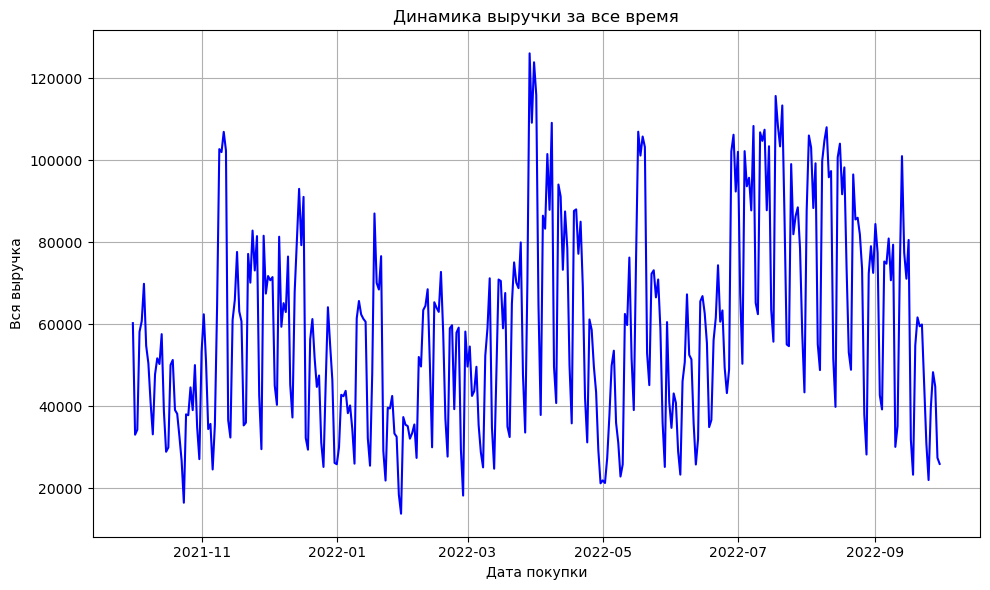

In [33]:
#группировка данных по дате покупки и суммирование выручки
revenue_over_time = data.groupby('issue_date')['revenue_amount'].sum()

#построение графика
plt.figure(figsize=(10, 6))
plt.plot(revenue_over_time.index, revenue_over_time.values, label='Вся выручка', color='blue')
plt.title('Динамика выручки за все время')
plt.xlabel('Дата покупки')
plt.ylabel('Вся выручка')
plt.grid(True)
plt.tight_layout()
plt.show()


После группировки и построения графика мы можем сделать вывод, что самая большая выручка пришлась на весну (120 000 у.е. составила выручка с марта по май 2022 года), а самая низкая выручка была в период с января по март (меньше 20 000 у.е)

Далее создадим отчет о выручке с детализацией по полям: ffp_flag, route_flight_type, sale_type и построим отдельные графики

Группировка данных по дате покупки и суммирование выручки с учетом наличия или отсутствия программы лояльности

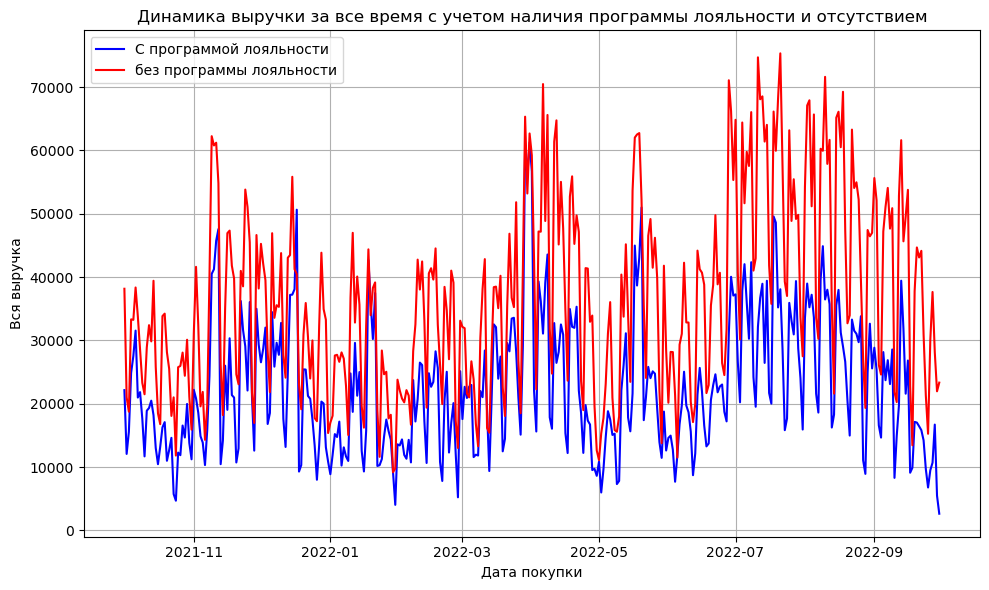

In [34]:
revenue_over_time_with_ffp = data[data['ffp_flag']==1].groupby('issue_date')['revenue_amount'].sum()
revenue_over_time_without_ffp = data[data['ffp_flag']==0].groupby('issue_date')['revenue_amount'].sum()

#построение графика
plt.figure(figsize=(10, 6))
plt.plot(revenue_over_time_with_ffp.index, revenue_over_time_with_ffp.values, label='С программой лояльности', color='blue')
plt.plot(revenue_over_time_without_ffp.index, revenue_over_time_without_ffp.values, label='без программы лояльности', color='red')
plt.title('Динамика выручки за все время с учетом наличия программы лояльности и отсутствием')
plt.xlabel('Дата покупки')
plt.ylabel('Вся выручка')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


По графику видно, что значительная часть выручки приходится на клиентов, не участвующих в программе лояльности, хотя покупатели, участвующие в программе, тоже вносят значительный вклад. Самая большая выручка наблюдалась с июля по сентябрь от участников, не участвующих в программелояльности.

Далее проведем группировку по дате покупки и суммирование выручки с учетом типа перелета (международный или внутри страны/локальный)

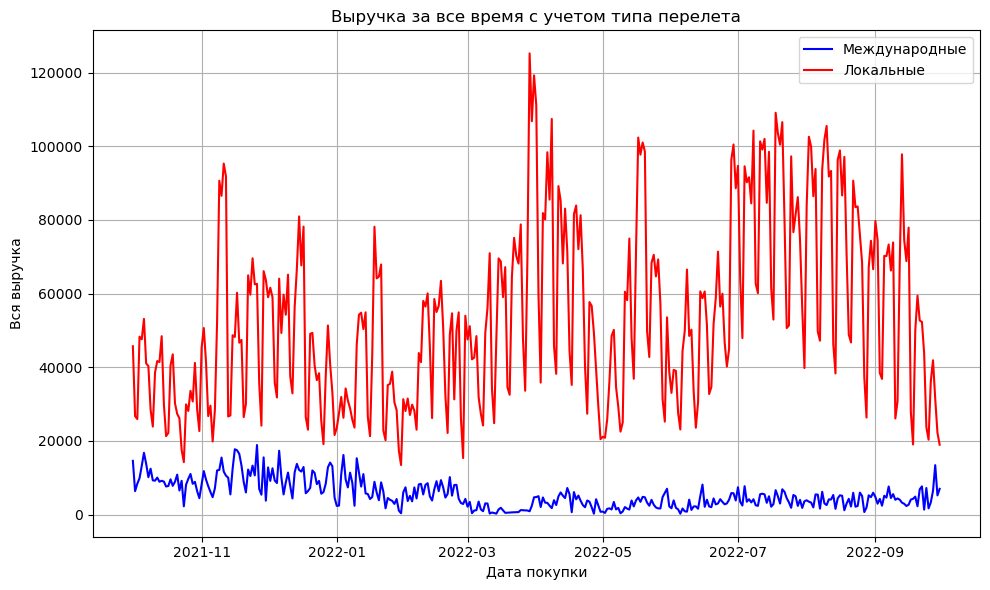

In [35]:
revenue_over_time_international = data[data['international_flight']==1].groupby('issue_date')['revenue_amount'].sum()
revenue_over_time_local = data[data['international_flight']==0].groupby('issue_date')['revenue_amount'].sum()

#построение графика
plt.figure(figsize=(10, 6))
plt.plot(revenue_over_time_international.index, revenue_over_time_international.values, label='Международные', color='blue')
plt.plot(revenue_over_time_local.index, revenue_over_time_local.values, label='Локальные', color='red')
plt.title('Выручка за все время с учетом типа перелета')
plt.xlabel('Дата покупки')
plt.ylabel('Вся выручка')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


По графику видно, что бОльшим спросом у покупателей пользуеются перелеты внутри страны, самую большую выручку, которую они принесли была в период с марта по май и составила 120 000 у.е.

Далее проведем группировку по дате покупки и суммирование выручки с учетом типа покупки билета (онлайн или оффлайн)

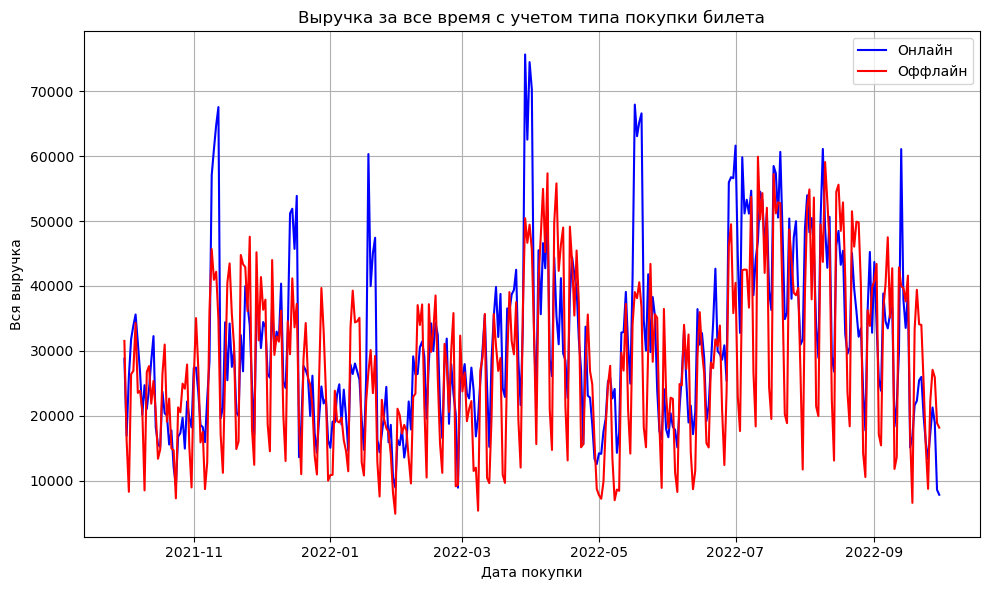

In [36]:
revenue_over_time_online = data[data['online']==1].groupby('issue_date')['revenue_amount'].sum()
revenue_over_time_offline = data[data['online']==0].groupby('issue_date')['revenue_amount'].sum()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(revenue_over_time_online.index, revenue_over_time_online.values, label='Онлайн', color='blue')
plt.plot(revenue_over_time_offline.index, revenue_over_time_offline.values, label='Оффлайн', color='red')
plt.title('Выручка за все время с учетом типа покупки билета')
plt.xlabel('Дата покупки')
plt.ylabel('Вся выручка')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


По графику мы можем сделать вывод, что онлайн-продажи (online) лидируют по выручке, бОльшую выручку они принесли в период с марта по май, она составила 70 000 у.е.

Построим общий отчет по выручке, принимая во внимание тип пассажиров. Для этого прогруппируем данные по типу пассажиров (взрослый или ребенок) и выручке.

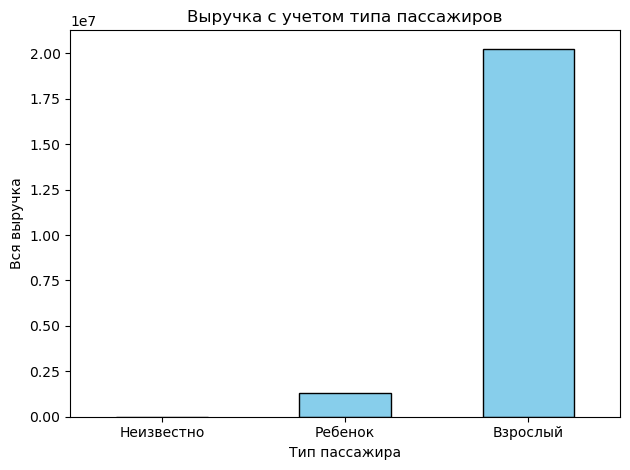

In [37]:
ax = data.groupby(['adult', 'child'])['revenue_amount'].sum().plot(
    kind='bar', 
    xlabel='Тип пассажира', 
    ylabel='Вся выручка', 
    title='Выручка с учетом типа пассажиров',
    color='skyblue',
    edgecolor='black'
)

#задаем новые метки для оси X
ax.set_xticklabels(['Неизвестно', 'Ребенок', 'Взрослый'])

#для улучшения отображения
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Мини-вывод: Основная часть выручки приходит от взрослых пассажиров. 

Для анализа построим график о выручке с учетом типа пассажиров, находя среднее значение для каждого типа. 

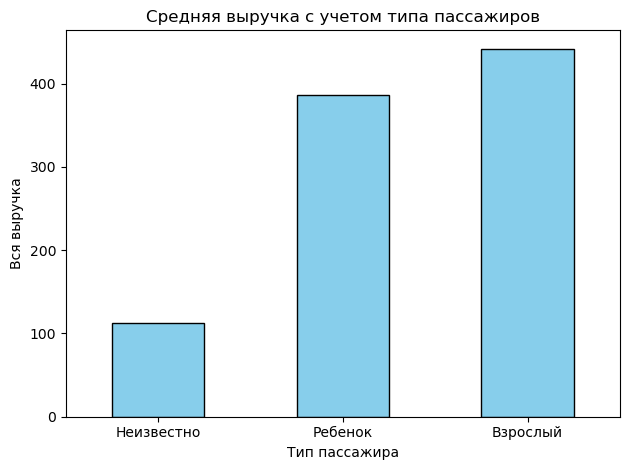

In [38]:
ax = data.groupby(['adult', 'child'])['revenue_amount'].mean().plot(
    kind='bar', 
    xlabel='Тип пассажира', 
    ylabel='Вся выручка', 
    title='Средняя выручка с учетом типа пассажиров',
    color='skyblue',
    edgecolor='black'
)

# Задаем новые метки для оси X
ax.set_xticklabels(['Неизвестно', 'Ребенок', 'Взрослый'])

# Для улучшения отображения
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Мини-вывод: Средняя выручка на одного ребенка почти такая же, как и у взрослого, но немного меньше.

Исходя из этих двух графиков, можно сделать вывод, взрослые пассажиры являются основными клиентами авиакомпании и приносят как наибольшую общую выручку, так и высокую среднюю выручку на одного пассажира.

Построим общий отчет по выручке, принимая во внимание тип покупки билета (онлайн/оффлайн). Для этого прогруппируем данные по типу покупки билета и выручке.

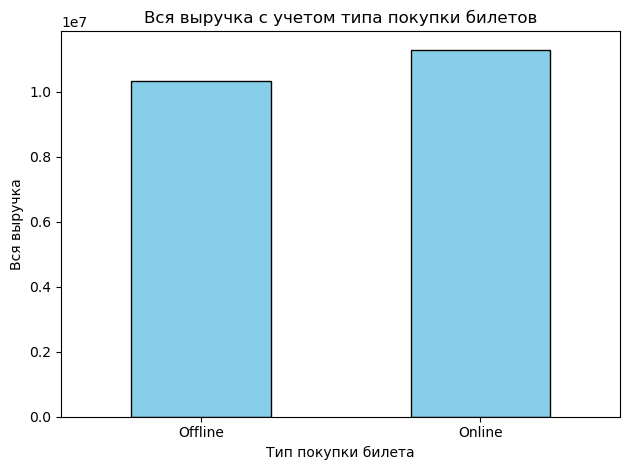

In [39]:
ax = data.groupby('online')['revenue_amount'].sum().plot(
    kind='bar', 
    xlabel='Тип покупки билета', 
    ylabel='Вся выручка', 
    title='Вся выручка с учетом типа покупки билетов',
    color='skyblue',
    edgecolor='black'
)

#задаем новые метки для оси X
ax.set_xticklabels(['Offline', 'Online'])

#для улучшения отображения
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Мини-вывод: выручка от покупки билетов оффлайн чуть меньше, чем от покупки билетов онлайн.

Для анализа построим график о выручке с учетом типа покупки билета, находя среднее значение для каждого типа.

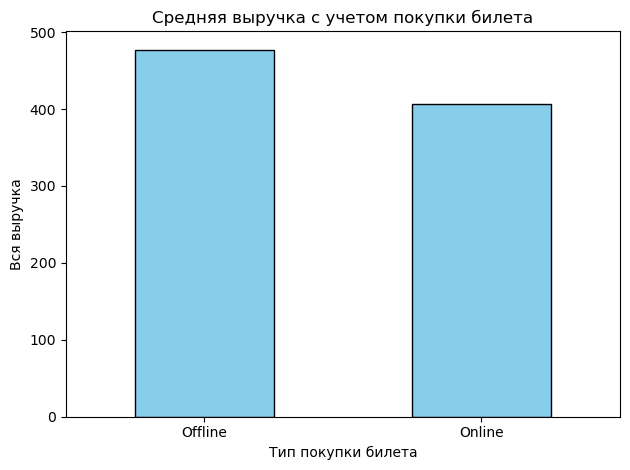

In [40]:
ax = data.groupby('online')['revenue_amount'].mean().plot(
    kind='bar', 
    xlabel='Тип покупки билета', 
    ylabel='Вся выручка', 
    title='Средняя выручка с учетом покупки билета',
    color='skyblue',
    edgecolor='black'
)

#задаем новые метки для оси X
ax.set_xticklabels(['Offline', 'Online'])

#для улучшения отображения
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Мини-вывод: по графику видно, что средняя выручка от покупки билетов оффлайн больше, чем от покупки билетов онлайн.

Делая вывод из этих двух графиков, можем сказать, что общая выручка от двух типов каналов продаж примерно одинаковая, хотя средняя выручка у оффлайн покупок больше, что значит, что совершая покупку в аэропорту они тратят больше средств. (Пс: возможно это можно связать с работой системы лояльности, но нужно проверять) 

Построим общий отчет по выручке, принимая во внимание тип перелета (международный/локальный). Для этого прогруппируем данные по типу перелета и выручке.

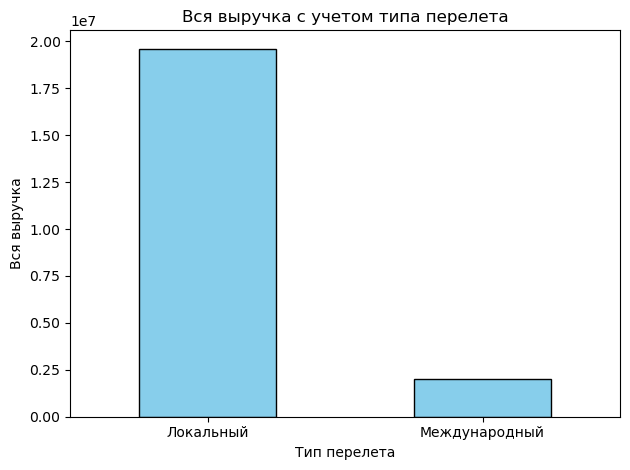

In [41]:
ax = data.groupby('international_flight')['revenue_amount'].sum().plot(
    kind='bar', 
    xlabel='Тип перелета', 
    ylabel='Вся выручка', 
    title='Вся выручка с учетом типа перелета',
    color='skyblue',
    edgecolor='black'
)

#задаем новые метки для оси X
ax.set_xticklabels(['Локальный', 'Международный'])

#для улучшения отображения
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Мини-вывод: исходя из графика делаем вывод, что выручка больше от международных перелетов, могу предположить, что это связано с ценой билета на международные перелеты.

Для лучшего анализа найдем среднюю выручку по каждому типу перелетов.

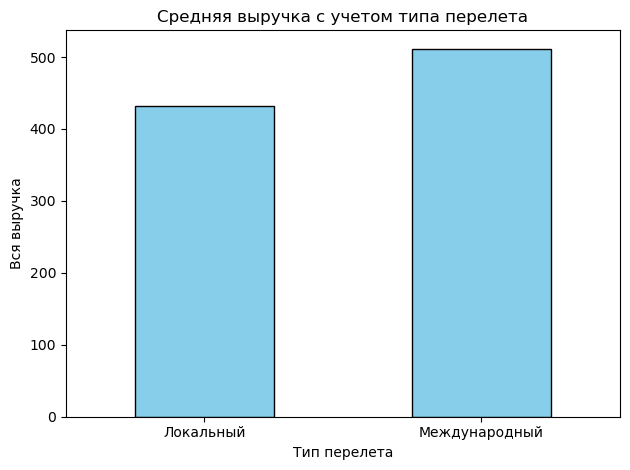

In [42]:
ax = data.groupby('international_flight')['revenue_amount'].mean().plot(
    kind='bar', 
    xlabel='Тип перелета', 
    ylabel='Вся выручка', 
    title='Средняя выручка с учетом типа перелета',
    color='skyblue',
    edgecolor='black'
)

#задаем новые метки для оси X
ax.set_xticklabels(['Локальный', 'Международный'])

#для улучшения отображения
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Мини-вывод:по графику можем заметить, что и средняя выручка больше у международных перелетов.

Исходя из графика, который мы делали раннее (линейный график выручки по дате и типу перелета), можно сказать,что локальные перелеты составляют основную долю продаж и приносят наибольшую общую выручку, несмотря на то, что международные перелеты приносят больше выручки на один билет.

Построим отчет о выручке с учетом наличия или отсутствия программы лояльности. Для анализа мы сгруппируем данные о выручке с данными о программе лояльности.

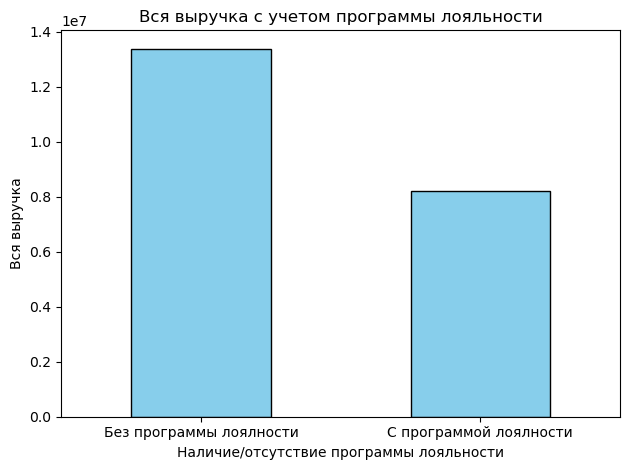

In [43]:
ax = data.groupby('ffp_flag')['revenue_amount'].sum().plot(
    kind='bar', 
    xlabel='Наличие/отсутствие программы лояльности', 
    ylabel='Вся выручка', 
    title='Вся выручка с учетом программы лояльности',
    color='skyblue',
    edgecolor='black'
)

#задаем новые метки для оси X
ax.set_xticklabels(['Без программы лоялности', 'С программой лоялности'])

#для улучшения отображения
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Мини-вывод: выручка больше от покупки билетов без программы лояльности, что очевидно, потому что билеты покупают без различных скидок/акций и бонусов.

Для анализа проверим средняя выручка больше от покупки билетов с учетом программы лояльности или без нее.

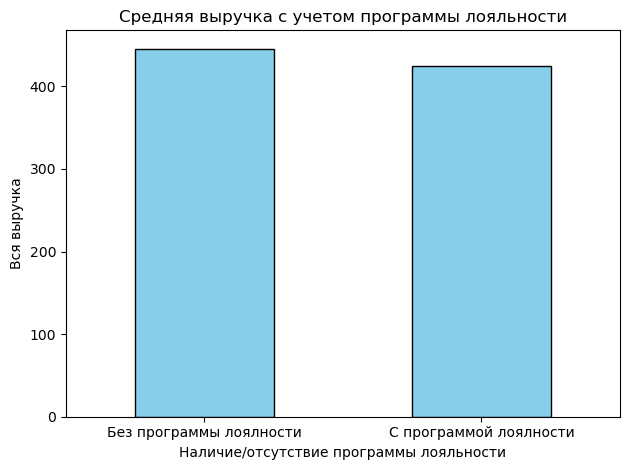

In [44]:
ax = data.groupby('ffp_flag')['revenue_amount'].mean().plot(
    kind='bar', 
    xlabel='Наличие/отсутствие программы лояльности', 
    ylabel='Вся выручка', 
    title='Средняя выручка с учетом программы лояльности',
    color='skyblue',
    edgecolor='black'
)

#задаем новые метки для оси X
ax.set_xticklabels(['Без программы лоялности', 'С программой лоялности'])

#для улучшения отображения
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Мини-вывод: как и стоило ожидать, средняя выручка при покупке билета без учета программы лояльности будет больше.

Несмотря на то, что клиенты без программы лояльности приносят значительно больше общей выручки, средняя выручка на одного клиента практически одинакова как для участников программы лояльности, так и для тех, кто не участвует. Это может свидетельствовать о том, что программа лояльности не оказывает заметного влияния на средний размер покупки

## 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.


Перед статистическим исследованием необходимо определить является ли в выборка нормально распределенной, для этого построим Q-Q график.

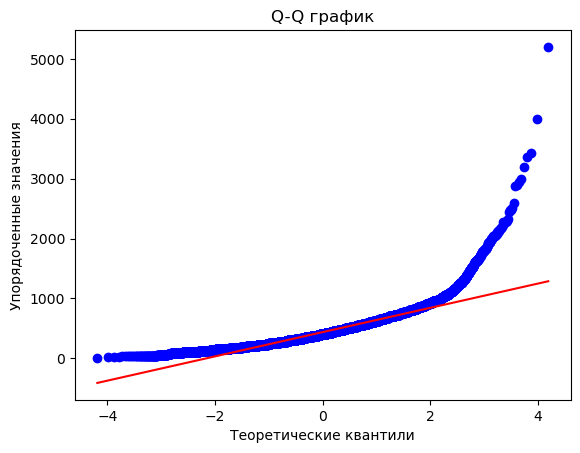

In [45]:
st.probplot(data['revenue_amount'], dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Упорядоченные значения')
plt.title('Q-Q график')
plt.show()

По графику видно, что распределение не нормальное, а имеет правостороннюю асимметрию.

In [46]:
#статистическое описание выручки
revenue_stats = data['revenue_amount'].describe()
revenue_stats

count    49362.000000
mean       437.631579
std        214.611412
min         10.000000
25%        290.000000
50%        400.000000
75%        550.000000
max       5200.000000
Name: revenue_amount, dtype: float64

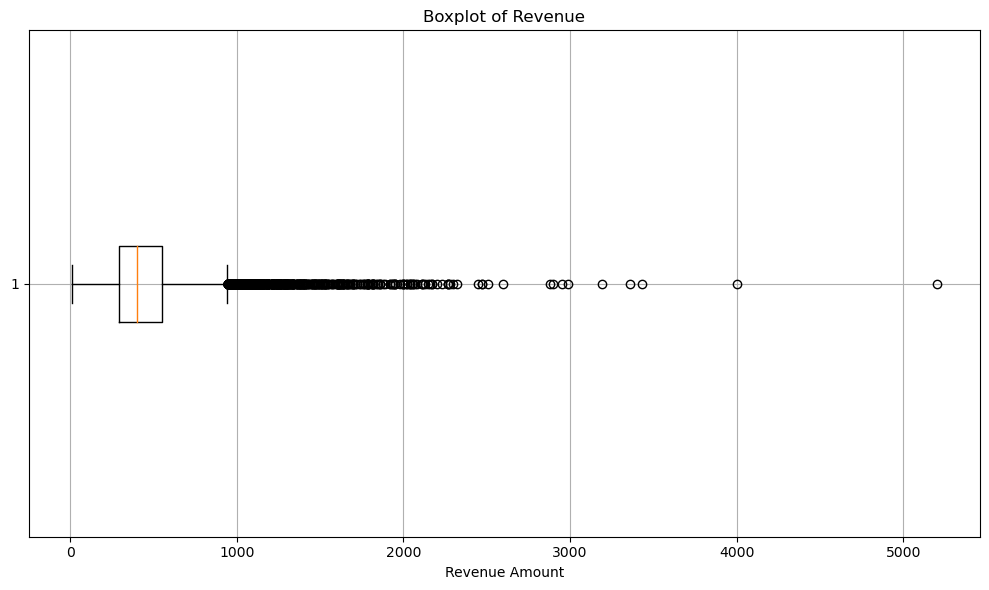

In [47]:
#построение boxplot для визуализации выбросов
plt.figure(figsize=(10, 6))
plt.boxplot(data['revenue_amount'], vert=False)
plt.title('Boxplot of Revenue')
plt.xlabel('Revenue Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

Из графика boxplot мы видим, что имеется большое количество выбросов.

In [48]:
#найдем выбросы, которые находятся за пределами 99-го перцентиля
percentile_99 = data['revenue_amount'].quantile(0.99)

Отфильтруем данные, исключив значения выше 99-го перцентиля, чтобы датасет имел описательные статистики более объективного характера

In [49]:
data_filtered = data[data['revenue_amount'] <= percentile_99]

Построим boxplot для визуализации выбросов после исключения выбросов за 99-ым перцентилем

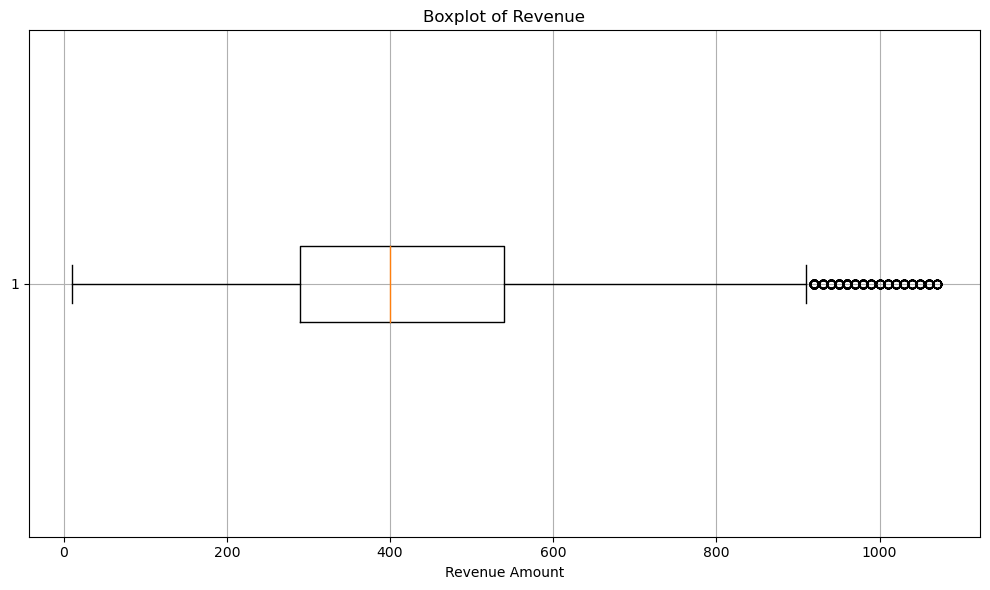

In [50]:
plt.figure(figsize=(10, 6))
plt.boxplot(data_filtered['revenue_amount'], vert=False)
plt.title('Boxplot of Revenue')
plt.xlabel('Revenue Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
#проверим, как изменилась описательная статистика датасета после удаления выбросов.
data_filtered['revenue_amount'].describe()

count    48884.000000
mean       427.923451
std        186.987621
min         10.000000
25%        290.000000
50%        400.000000
75%        540.000000
max       1070.000000
Name: revenue_amount, dtype: float64

## 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.


Добавим столбцы месяца и сезона в наш датафрейм.

In [52]:
#добавим в данные столбцы с месяцем и сезоном для анализа сезонности
data_filtered['month'] = data_filtered['issue_date'].dt.month

#функция для определения сезона
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data_filtered['season'] = data_filtered['month'].apply(get_season)

C:\Users\HP\AppData\Local\Temp\ipykernel_2472\412834912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['issue_date'].dt.month
C:\Users\HP\AppData\Local\Temp\ipykernel_2472\412834912.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['season'] = data_filtered['month'].apply(get_season)


In [53]:
data_filtered

,issue_date,flight_date_loc,revenue_amount,orig_city_code,dest_city_code,ffp_flag,international_flight,online,adult,child,month,season
0,2021-12-07,2022-01-11,200,MOW,KGD,0,0,1,1,0,12,Winter
1,2021-12-31,2022-01-03,610,UUS,OVB,0,0,0,1,0,12,Winter
2,2021-11-28,2022-01-04,390,KGD,MOW,1,0,1,1,0,11,Autumn
3,2021-12-08,2022-01-05,190,VOZ,MOW,0,0,1,1,0,12,Winter
4,2021-12-08,2022-01-12,190,MOW,KRR,1,0,0,1,0,12,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,480,MOW,OMS,0,0,1,0,1,6,Summer
49996,2022-06-06,2022-06-20,270,LED,MOW,0,0,0,1,0,6,Summer
49997,2022-06-26,2022-06-29,230,MOW,KZN,1,0,1,1,0,6,Summer
49998,2022-06-26,2022-06-28,270,KZN,MOW,0,0,0,1,0,6,Summer


Построим графики выручки и числа продаж по месяцам:

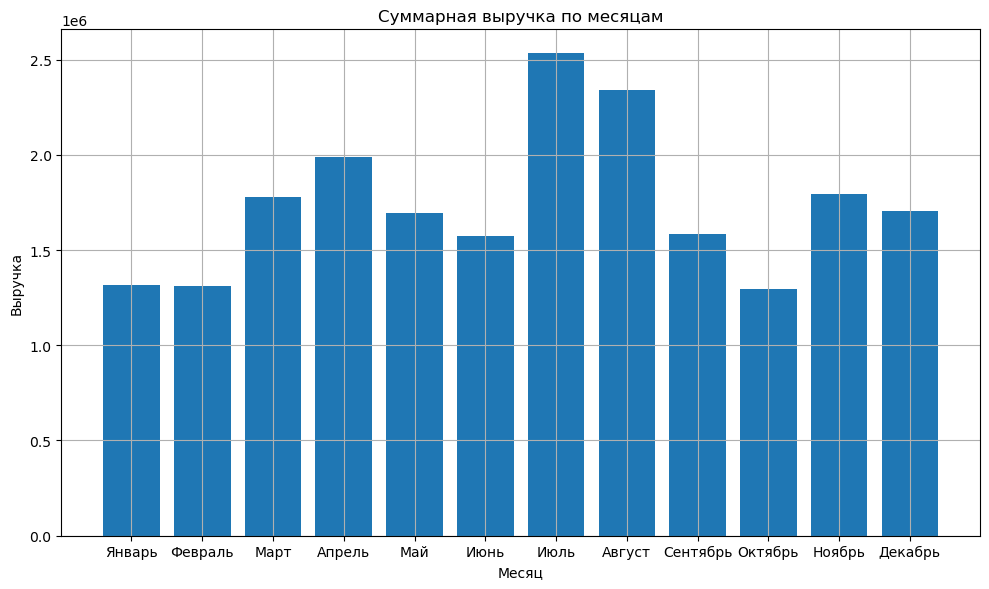

In [54]:
#группировка по месяцам для анализа сезонности
monthly_revenue = data_filtered.groupby('month')['revenue_amount'].sum()

#построение графика выручки по месяцам
plt.figure(figsize=(10, 6))
plt.bar(monthly_revenue.index, monthly_revenue.values)
plt.title('Суммарная выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(sorted(data_filtered['month'].unique()),labels=['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь'])
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


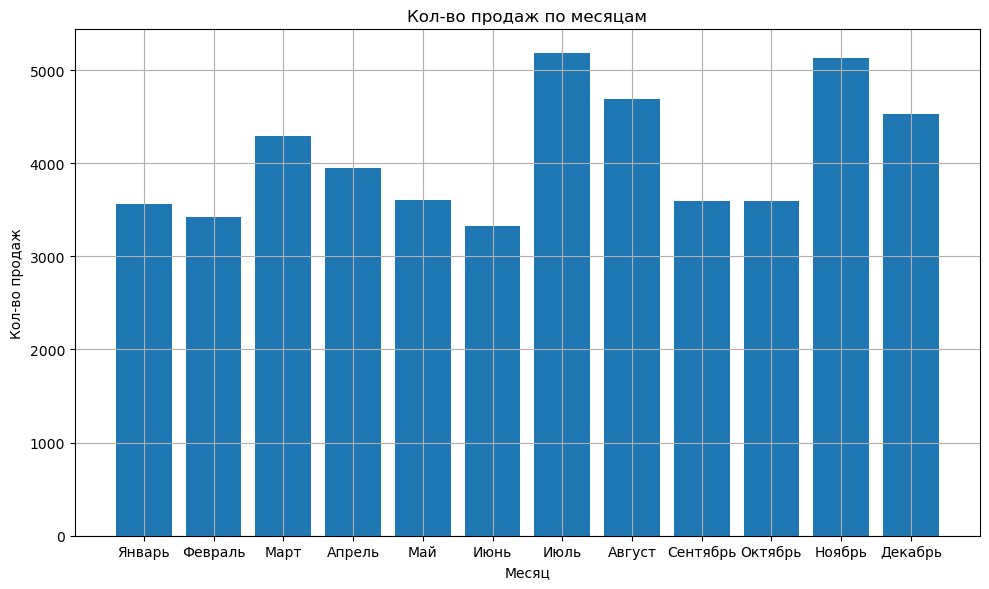

In [55]:
#группировка по месяцам для анализа сезонности
monthly_revenue = data_filtered.groupby('month')['revenue_amount'].count()

#построение графика выручки по месяцам
plt.figure(figsize=(10, 6))
plt.bar(monthly_revenue.index, monthly_revenue.values)
plt.title('Кол-во продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Кол-во продаж')
plt.xticks(sorted(data_filtered['month'].unique()),labels=['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь'])
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

На основании этих графиков можем сделать следующие выводы:
1) Самая большая выручка за год была в июле и августе. В эти же месяцы люди чаще всего покупали билеты.
2) Так же часто люди покупали билеты и в ноябре, декабре, однако выручка в зимний сезон намного меньше, чем в летний.

Проверим гипотезу о том, что выручка от продаж осенью и зимой отличается.

Для начала проверим данные на нормальность распределения.

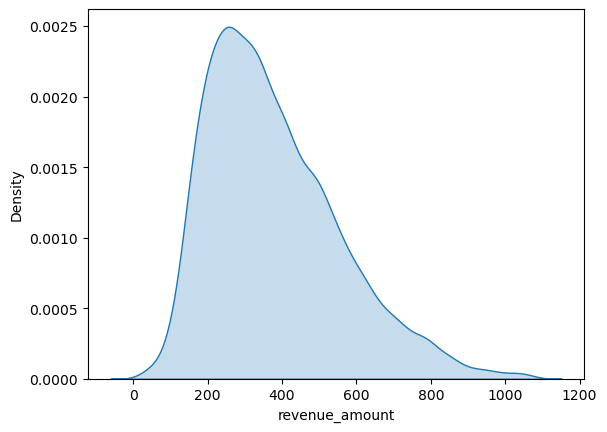

In [56]:
autumn_revenue = data_filtered[data_filtered['season'] == 'Autumn']['revenue_amount']
sns.kdeplot(autumn_revenue, fill=True)
plt.show()

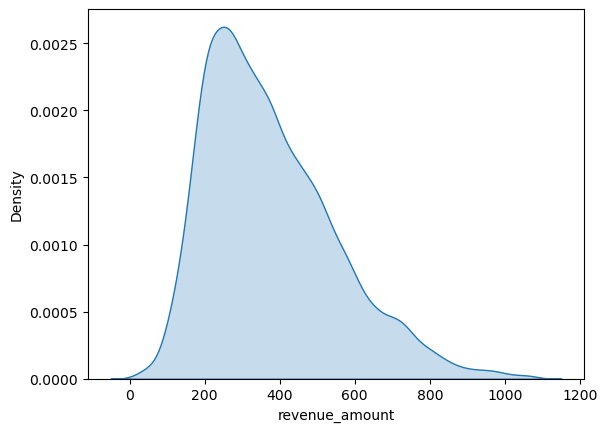

In [57]:
winter_revenue = data_filtered[data_filtered['season'] == 'Winter']['revenue_amount']

sns.kdeplot(winter_revenue, fill=True)
plt.show()

По гистограммам видно, что данные имеют ассиметрию, соответственно они не имеют нормального распределения. Применим тест Манна-Уитни, который не требует нормальности распределения.

Сформулируем нулевую гипотезу: <br>
$H_0$ - средняя выручка в осенний период равна средней выручке зимой.<br>
$H_1$ - средняя выручка в осенний период не равна средней выручке зимой.<br>

In [58]:
from scipy.stats import mannwhitneyu

#применим тест Манна-Уитни для независимых выборок
stat, p_value = mannwhitneyu(autumn_revenue, winter_revenue, alternative='two-sided')

if p_value < 0.05:
    print('Отклоняем нулевую гипотезу, существует значимое различие')
else:
    print('Не удалось отвергнуть нулевую гипотезу')


Не удалось отвергнуть нулевую гипотезу


Не удалось отвергнуть нулевую гипотезу, а значит средняя выручка в осенний период равна средней выручке в зимний период.

C:\Users\HP\AppData\Local\Temp\ipykernel_2472\3175992063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['season'] = data_filtered['season'].map({'Winter': 0, 'Autumn': 1, 'Spring': 2, 'Summer': 3})


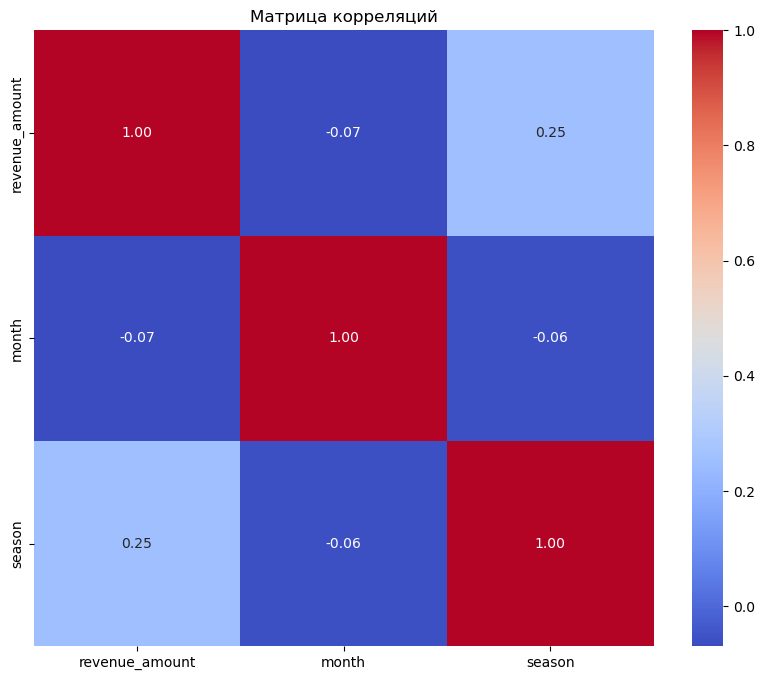

,revenue_amount,month,season
revenue_amount,1.000000,-0.069588,0.253683
month,-0.069588,1.000000,-0.057837
season,0.253683,-0.057837,1.000000


In [59]:
#проверим корреляцию и построим график
data_filtered['season'] = data_filtered['season'].map({'Winter': 0, 'Autumn': 1, 'Spring': 2, 'Summer': 3})

correlation_data = data_filtered[['revenue_amount', 'month', 'season']]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

correlation_matrix

Видим значительную корелляцию между выручкой и сезоном, однако корелляции между сезоном и месяцем нет, что неверно. Чтобы это исправить, попробуем разбить эти категориальные данные на множество численных столбцов (корелляции между категориальными данными считаются плохо).

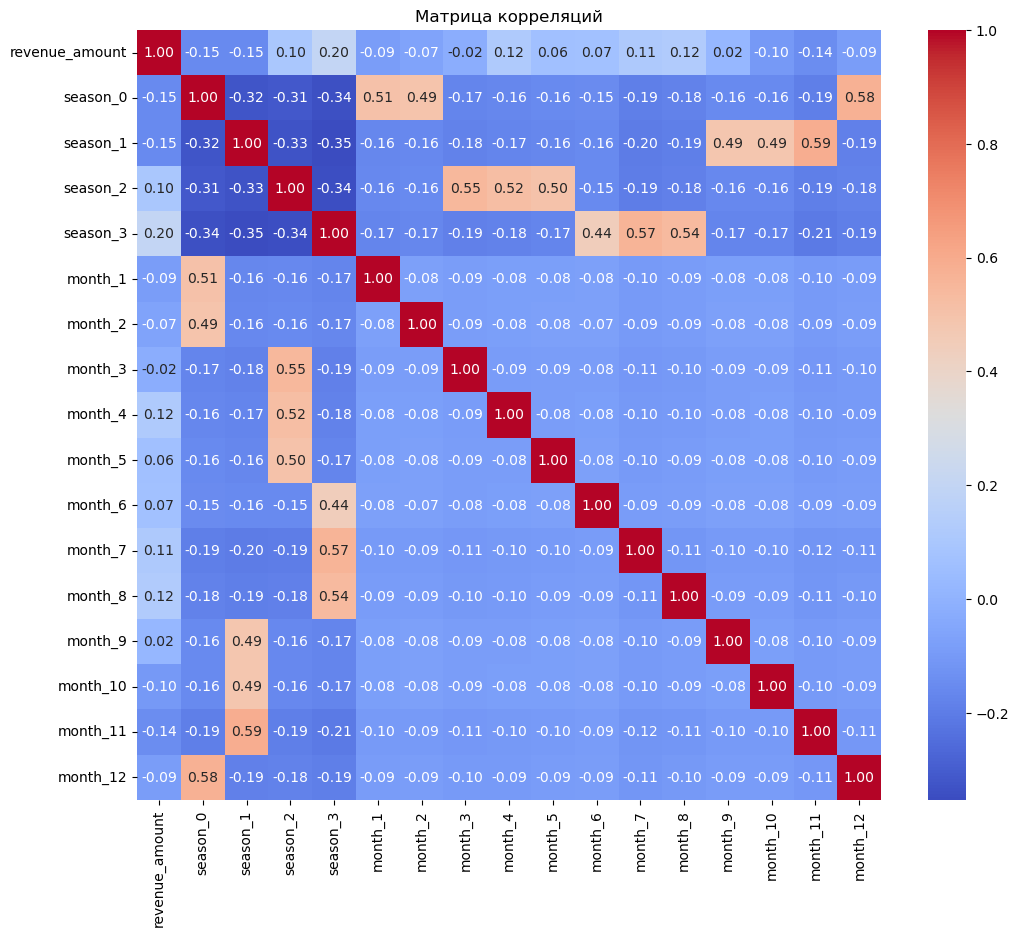

,revenue_amount,season_0,season_1,season_2,season_3,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
revenue_amount,1.000000,-0.153677,-0.152331,0.101039,0.198394,-0.087460,-0.066961,-0.022457,0.121600,0.063253,0.066618,0.112652,0.124349,0.018470,-0.102208,-0.144470,-0.087550
season_0,-0.153677,1.000000,-0.322369,-0.314077,-0.337721,0.505076,0.494377,-0.172372,-0.164532,-0.156736,-0.150040,-0.191165,-0.180991,-0.156454,-0.156383,-0.190255,0.575489
season_1,-0.152331,-0.322369,1.000000,-0.328241,-0.352951,-0.162821,-0.159372,-0.180145,-0.171952,-0.163804,-0.156806,-0.199786,-0.189153,0.485325,0.485107,0.590179,-0.185520
season_2,0.101039,-0.314077,-0.328241,1.000000,-0.343873,-0.158633,-0.155273,0.548820,0.523859,0.499035,-0.152773,-0.194647,-0.184288,-0.159304,-0.159232,-0.193721,-0.180748
season_3,0.198394,-0.337721,-0.352951,-0.343873,1.000000,-0.170575,-0.166962,-0.188724,-0.180141,-0.171605,0.444272,0.566044,0.535918,-0.171296,-0.171219,-0.208305,-0.194355
month_1,-0.087460,0.505076,-0.162821,-0.158633,-0.170575,1.000000,-0.077021,-0.087061,-0.083101,-0.079163,-0.075782,-0.096553,-0.091414,-0.079021,-0.078986,-0.096094,-0.089658
month_2,-0.066961,0.494377,-0.159372,-0.155273,-0.166962,-0.077021,1.000000,-0.085217,-0.081341,-0.077486,-0.074176,-0.094508,-0.089478,-0.077347,-0.077312,-0.094058,-0.087759
month_3,-0.022457,-0.172372,-0.180145,0.548820,-0.188724,-0.087061,-0.085217,1.000000,-0.091943,-0.087586,-0.083845,-0.106826,-0.101141,-0.087429,-0.087390,-0.106318,-0.099198
month_4,0.121600,-0.164532,-0.171952,0.523859,-0.180141,-0.083101,-0.081341,-0.091943,1.000000,-0.083603,-0.080031,-0.101968,-0.096541,-0.083453,-0.083415,-0.101482,-0.094686
month_5,0.063253,-0.156736,-0.163804,0.499035,-0.171605,-0.079163,-0.077486,-0.087586,-0.083603,1.000000,-0.076239,-0.097136,-0.091966,-0.079498,-0.079462,-0.096674,-0.090200


In [60]:
#применение One-Hot Encoding к столбцам 'season' и 'month'
data_encoded = pd.get_dummies(data_filtered, columns=['season', 'month'])

#подготовка данных для корреляционной матрицы
correlation_data = data_encoded[['revenue_amount'] + list(data_encoded.columns[data_encoded.columns.str.startswith('season_')]) + list(data_encoded.columns[data_encoded.columns.str.startswith('month_')])]

#рассчитываем корреляционную матрицу
correlation_matrix = correlation_data.corr()

#визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

#выводим корреляционную матрицу
correlation_matrix

Теперь видно, что каждый месяц/сезон влияет на выручку. Самый большой коэффициент корелляции у летнего сезона, что мы уже видели по другим графикам.

## 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.


В датасете содержится информация о времени покупки билета, поэтому мы можем выделить группы по времени покупки билета.
Группы: "Заранее" (более чем за 30 дней), "Средний срок" (от 7 до 30 дней), "В последний момент" (меньше 7 дней)

In [61]:
#определим группы по времени покупки билета
#группы: "Заранее" (более чем за 30 дней), "Средний срок" (от 7 до 30 дней), "В последний момент" (меньше 7 дней)
data_filtered['days_before_flight'] = (data_filtered['flight_date_loc'] - data_filtered['issue_date']).dt.days

def categorize_purchase_time(days):
    if days > 30:
        return '> 30 дней'
    elif days <= 7:
        return 'неделя'
    else:
        return '7-30 дней'

data_filtered['purchase_time_group'] = data_filtered['days_before_flight'].apply(categorize_purchase_time)

C:\Users\HP\AppData\Local\Temp\ipykernel_2472\2164775042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['days_before_flight'] = (data_filtered['flight_date_loc'] - data_filtered['issue_date']).dt.days
C:\Users\HP\AppData\Local\Temp\ipykernel_2472\2164775042.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['purchase_time_group'] = data_filtered['days_before_flight'].apply(categorize_purchase_time)


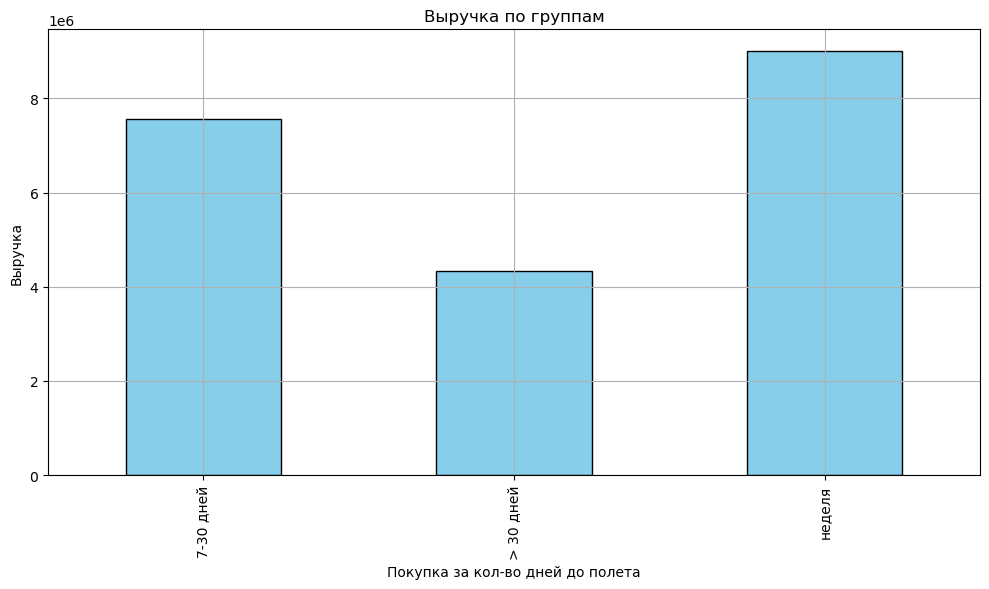

purchase_time_group
7-30 дней    7564770
> 30 дней    4341510
неделя       9012330
Name: revenue_amount, dtype: int64

In [62]:
#суммарная выручка для каждой из групп
purchase_time_revenue = data_filtered.groupby('purchase_time_group')['revenue_amount'].sum()

#визуализируем выручку для каждой группы
plt.figure(figsize=(10, 6))
purchase_time_revenue.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Выручка по группам')
plt.xlabel('Покупка за кол-во дней до полета')
plt.ylabel('Выручка')
plt.grid(True)
plt.tight_layout()
plt.show()

#выводим выручку по каждой группе
purchase_time_revenue

По данному графику можно увидеть, что люди покупают больше билетов за неделю до вылета, чем в остальные промежутки времени. 

Проверим гипотезу о том, что выручка от продажи билетов заранее и в последний момент отличается. Проверим эти группы на нормальность распределения выручки (используем тест Шапиро-Уилка).

In [63]:
from scipy.stats import shapiro

advance_group = data_filtered[data_filtered['purchase_time_group'] == '> 30 дней']['revenue_amount']
week_group = data_filtered[data_filtered['purchase_time_group'] == 'неделя']['revenue_amount']


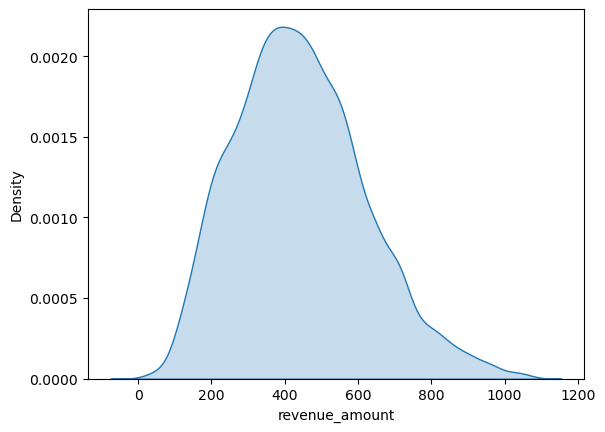

Выборка не нормально распределена.


c:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [64]:
sns.kdeplot(advance_group, fill=True)
plt.show()

stat_advance, p_advance = shapiro(advance_group)

if p_advance < 0.05:
    print('Выборка не нормально распределена.')
else:
    print('Выборка нормально распределена.')

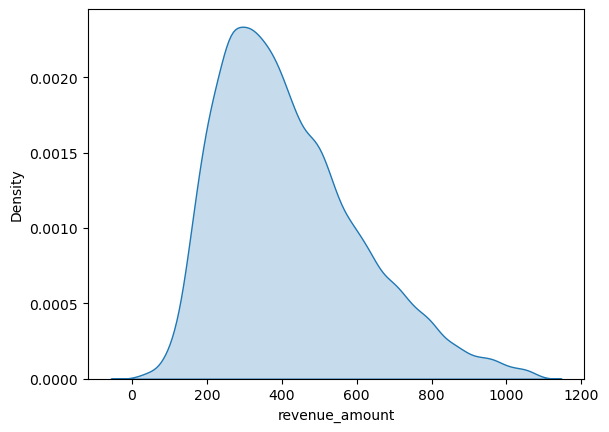

Выборка не нормально распределена.


c:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [65]:
sns.kdeplot(week_group, fill=True)
plt.show()

stat_advance, p_advance = shapiro(week_group)

if p_advance < 0.05:
    print('Выборка не нормально распределена.')
else:
    print('Выборка нормально распределена.')

Так выборки не распределены нормально, используем тест Манна-Уитни.

Сформулируем нулевую гипотезу: <br>
$H_0$ - средняя выручка за неделю до полета равна средней выручке заранее.<br>
$H_1$ - средняя выручка за неделю до полета не равна средней выручке заранее.<br>

In [66]:
# Применим тест Манна-Уитни для независимых выборок
stat, p_value = mannwhitneyu(week_group, advance_group, alternative='two-sided')

if p_value < 0.05:
    print('Отклоняем нулевую гипотезу, существует значимое различие')
else:
    print('Не удалось отвергнуть нулевую гипотезу')


Отклоняем нулевую гипотезу, существует значимое различие


Отклоняем нулевую гипотез, а значит средняя выручка за неделю до полета отличается от средней выручки купленных билетов заранее.

## 3.5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета: https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

Загрузим датасет с кодами аэропортов, соответствующие городам.

In [67]:
import pandas as pd
import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'

airports = pd.read_csv(url, usecols=lambda x: x != '1') #исключаем столбец с именем "1"
airports.columns = ['Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']

In [68]:
#проверяем как выглядит датасет
airports.head()

,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
0,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
1,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports


In [69]:
#добавляем новую строку в датасет об аэропорте Домодедово с заполнением пропусков
airports.loc[len(airports.index)] = ['Moscow Domodedovo Airport', 'Moscow', 'Russia', 'MOW', 'MOW', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

Самые популярные направления полетов внутри страны

In [70]:
#с помощью фильтрации и группировки выявили самые популярные направления полетов внутри страны
top10 = data_filtered[data_filtered['international_flight'] == 0].groupby(['orig_city_code', 'dest_city_code']).count().sort_values(by='revenue_amount',ascending=False)[:10].add_suffix('_count').reset_index()

top10['orig_city_code'] = top10['orig_city_code'].map(lambda x: airports[airports['IATA_Code'] == x]['Location'].values[0])
top10['dest_city_code'] = top10['dest_city_code'].map(lambda x: airports[airports['IATA_Code'] == x]['Location'].values[0])


In [71]:
#выводим топ- 10 направлений
top10

,orig_city_code,dest_city_code,issue_date_count,flight_date_loc_count,revenue_amount_count,ffp_flag_count,international_flight_count,online_count,adult_count,child_count,month_count,season_count,days_before_flight_count,purchase_time_group_count
0,Sochi,Moscow,1330,1330,1330,1330,1330,1330,1330,1330,1330,1330,1330,1330
1,Moscow,Sochi,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300
2,St. Petersburg,Moscow,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211
3,Moscow,St. Petersburg,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192,1192
4,Novosibirsk,Moscow,967,967,967,967,967,967,967,967,967,967,967,967
5,Moscow,Novosibirsk,944,944,944,944,944,944,944,944,944,944,944,944
6,Kazan,Moscow,759,759,759,759,759,759,759,759,759,759,759,759
7,Moscow,Kazan,757,757,757,757,757,757,757,757,757,757,757,757
8,Moscow,Ufa,708,708,708,708,708,708,708,708,708,708,708,708
9,Novosibirsk,Sochi,675,675,675,675,675,675,675,675,675,675,675,675


С помощью фильтрации и группировки выявили самые популярные направления международных полетов.

In [72]:
top10 = data_filtered[data_filtered['international_flight'] == 1].groupby(['orig_city_code', 'dest_city_code']).count().sort_values(by='revenue_amount',ascending=False)[:10].add_suffix('_count').reset_index()

top10['orig_city_code'] = top10['orig_city_code'].map(lambda x: airports[airports['IATA_Code'] == x]['Location'].values[0])
top10['dest_city_code'] = top10['dest_city_code'].map(lambda x: airports[airports['IATA_Code'] == x]['Location'].values[0])

In [73]:
#выводим топ- 10 направлений международных полетов
top10

,orig_city_code,dest_city_code,issue_date_count,flight_date_loc_count,revenue_amount_count,ffp_flag_count,international_flight_count,online_count,adult_count,child_count,month_count,season_count,days_before_flight_count,purchase_time_group_count
0,Moscow,Osh,152,152,152,152,152,152,152,152,152,152,152,152
1,Khudzhand,Moscow,146,146,146,146,146,146,146,146,146,146,146,146
2,Osh,Moscow,136,136,136,136,136,136,136,136,136,136,136,136
3,Moscow,Khudzhand,130,130,130,130,130,130,130,130,130,130,130,130
4,Novosibirsk,Bishkek,120,120,120,120,120,120,120,120,120,120,120,120
5,Novosibirsk,Osh,119,119,119,119,119,119,119,119,119,119,119,119
6,Osh,Novosibirsk,116,116,116,116,116,116,116,116,116,116,116,116
7,Khudzhand,Novosibirsk,116,116,116,116,116,116,116,116,116,116,116,116
8,Bishkek,Novosibirsk,102,102,102,102,102,102,102,102,102,102,102,102
9,Moscow,Antalya,102,102,102,102,102,102,102,102,102,102,102,102


<Axes: title={'center': 'Топ 10 направлений ВВЛ'}, xlabel='Направление', ylabel='Выручка'>

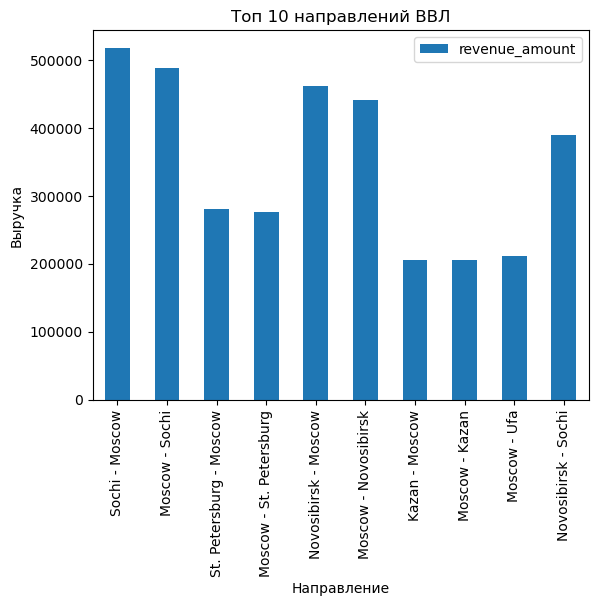

In [74]:
top10 = data_filtered[data_filtered['international_flight'] == 0].groupby(['orig_city_code', 'dest_city_code']).agg({'revenue_amount': 'sum', 'issue_date': 'count'}).sort_values(by='issue_date', ascending=False).head(10).reset_index()

top10['orig_city_code'] = top10['orig_city_code'].map(lambda x: airports[airports['IATA_Code'] == x]['Location'].values[0])
top10['dest_city_code'] = top10['dest_city_code'].map(lambda x: airports[airports['IATA_Code'] == x]['Location'].values[0])
top10['route'] = top10['orig_city_code'] + ' - ' + top10['dest_city_code']

top10.plot(x='route', y='revenue_amount', kind='bar', xlabel='Направление', ylabel='Выручка', title='Топ 10 направлений ВВЛ')

По графику можем сделать вывод, что самым популярным направлением внутри страны является Сочи- Москва, после него идет направление Москва- Сочи, а также вторые по популярности Новосибирск-Москва и Москва- Новосибирск.

<Axes: title={'center': 'Топ 10 направлений МВЛ'}, xlabel='Направление', ylabel='Выручка'>

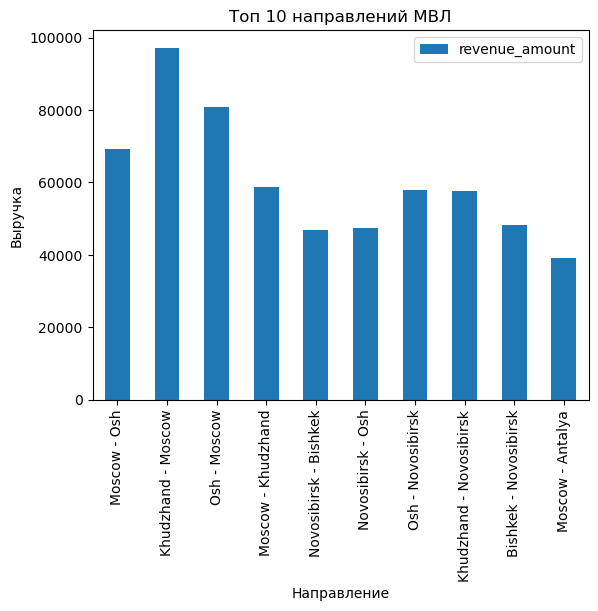

In [75]:
top10 = data_filtered[data_filtered['international_flight'] == 1].groupby(['orig_city_code', 'dest_city_code']).agg({'revenue_amount': 'sum', 'issue_date': 'count'}).sort_values(by='issue_date', ascending=False).head(10).reset_index()

top10['orig_city_code'] = top10['orig_city_code'].map(lambda x: airports[airports['IATA_Code'] == x]['Location'].values[0])
top10['dest_city_code'] = top10['dest_city_code'].map(lambda x: airports[airports['IATA_Code'] == x]['Location'].values[0])
top10['route'] = top10['orig_city_code'] + ' - ' + top10['dest_city_code']

top10.plot(x='route', y='revenue_amount', kind='bar', xlabel='Направление', ylabel='Выручка', title='Топ 10 направлений МВЛ')

По графику можем сделать вывод, что самым популярным международным направлением является Khudzhand - Moscow, а вторым по популярности Osh- Moscow.

## 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Для создания матрицы корреляций выберем числовые признаки с помощью фильтрации данных.

In [76]:
correlation_data = data_filtered[['revenue_amount', 'days_before_flight', 'online', 'adult', 'child', 'international_flight']]

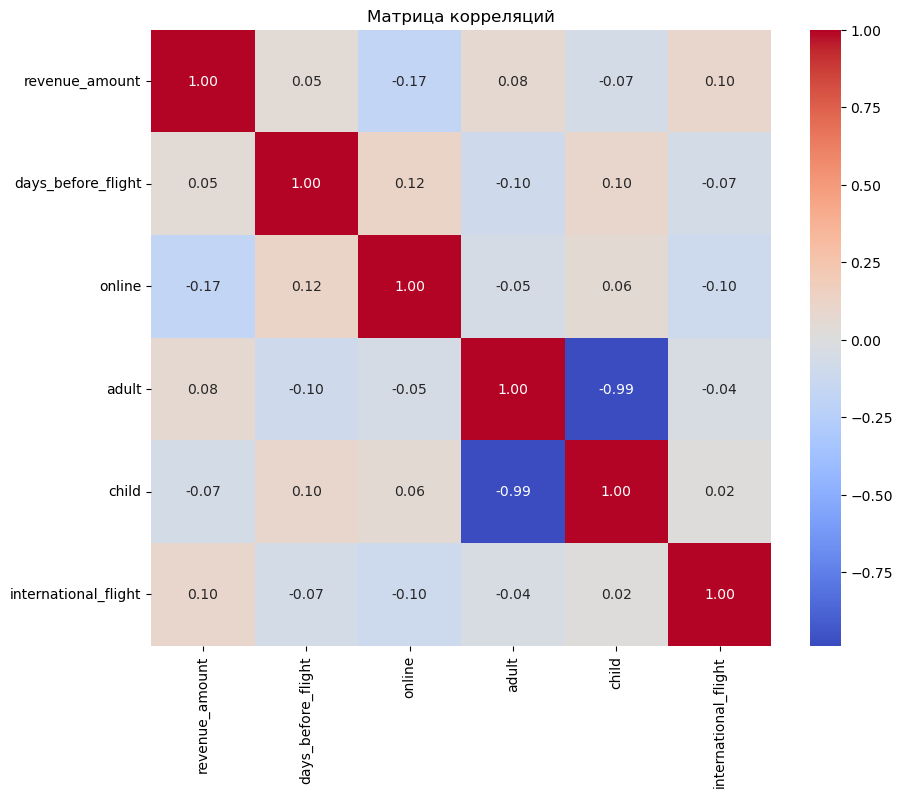

,revenue_amount,days_before_flight,online,adult,child,international_flight
revenue_amount,1.000000,0.050035,-0.171915,0.076008,-0.065293,0.097557
days_before_flight,0.050035,1.000000,0.122716,-0.096502,0.099168,-0.067920
online,-0.171915,0.122716,1.000000,-0.053421,0.055396,-0.104436
adult,0.076008,-0.096502,-0.053421,1.000000,-0.986777,-0.038680
child,-0.065293,0.099168,0.055396,-0.986777,1.000000,0.022034
international_flight,0.097557,-0.067920,-0.104436,-0.038680,0.022034,1.000000


In [77]:
#построим матрицу корреляций и выведем ее
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

correlation_matrix

Исходя из матрицы корреляции, можем сделать вывод: слабая положительная корреляция с признаком международного рейса (international_flight) — 0.10; слабая отрицательная корреляция с онлайн-покупками билетов (online) — -0.17; очень слабая положительная корреляция с количеством дней до вылета (days_before_flight) — 0.05, то есть время покупки билета слабо влияет на выручку; очень сильная отрицательная корреляция между признаками взрослого (adult) и ребенка (child) — -0.99, так как данные категории взаимоисключающие; очень слабая корреляция с другими признаками, указывающая на то, что время до вылета практически не влияет на такие факторы, как наличие международного рейса или возраст пассажира. 

Далее для создания матрицы сгруппируем данные по issue_date и суммирование числовых признаков

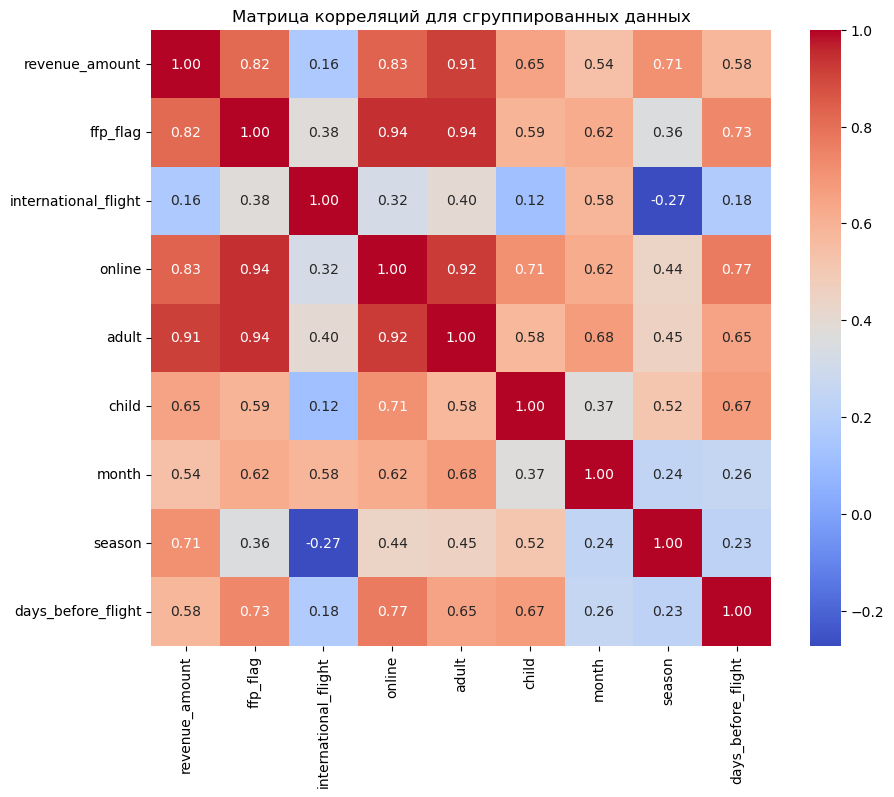

,revenue_amount,ffp_flag,international_flight,online,adult,child,month,season,days_before_flight
revenue_amount,1.000000,0.818054,0.160594,0.834775,0.911282,0.650656,0.538711,0.707093,0.580037
ffp_flag,0.818054,1.000000,0.376596,0.944091,0.944785,0.587951,0.620591,0.357713,0.734890
international_flight,0.160594,0.376596,1.000000,0.322388,0.402904,0.116059,0.584694,-0.272699,0.178174
online,0.834775,0.944091,0.322388,1.000000,0.924684,0.707557,0.617404,0.440660,0.768673
adult,0.911282,0.944785,0.402904,0.924684,1.000000,0.575475,0.676544,0.451091,0.650092
child,0.650656,0.587951,0.116059,0.707557,0.575475,1.000000,0.372354,0.515318,0.673263
month,0.538711,0.620591,0.584694,0.617404,0.676544,0.372354,1.000000,0.243091,0.257186
season,0.707093,0.357713,-0.272699,0.440660,0.451091,0.515318,0.243091,1.000000,0.229258
days_before_flight,0.580037,0.734890,0.178174,0.768673,0.650092,0.673263,0.257186,0.229258,1.000000


In [78]:
grouped_data = data_filtered.groupby('issue_date').sum(numeric_only=True)

#создание матрицы корреляций
correlation_matrix_grouped = grouped_data.corr()

#визуализация матрицы корреляций и вывод
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_grouped, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций для сгруппированных данных')
plt.show()

correlation_matrix_grouped

Из матрицы корреляции сделаем выводы: программа лояльности (ffp_flaf) имеет сильную положительную корреляцию с выручкой (0.82) и онлайн-покупками (0.94), что указывает на важность участия в программе лояльности для увеличения выручки и предпочтение онлайн-покупок; онлайн-покупки сильно коррелируют с выручкой (0.83); тип пассажира (Adult) также имеет сильную корреляцию с выручкой (0.91), что подтверждает, что взрослые пассажиры приносят основную долю дохода; время до вылета (Days_before_flight) показывает умеренную положительную корреляцию с выручкой (0.58); международные перелеты (International_flight) слабо коррелируют с выручкой (0.16), что говорит о меньшем вкладе международных рейсов в общую выручку по сравнению с другими факторами.

ВЫВОДЫ ПО ПУНКТУ 3:
Мы провели многосторонний анализ выручки авиакомпании, с учетом удаления выбросов, в том числе категориальных полей и сезонности, а так же ее корреляционной связи с ними. Кроме того, была осуществлена проверка гипотезы о равенстве средних различных генеральных совокупностей, позволяющих сделать выводы об изменении выручки. Все отчеты были сопровождены графиками.